In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
#Import basic libraries
import matplotlib.pyplot as plt
import seaborn as sns

According to the problem statement, Data compromises of two file:
- test.csv
- train.csv

Let's Load the data with the help of pandas dataframe

In [3]:
#Read the datasets available for the problem statement
train_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_data=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In order to understand the data, we will explore the `train_data` to understand the given data properly.

Let's start with the **Exploratory Data Analysis** 

## Exploratory Data Analysis

Let's start with understanding the dimensions  of the data

In [4]:
#Check shape of the dataset
print(f'Shape of train dataset: \nNumber of rows: {train_data.shape[0]}\nNumber of Columns: {train_data.shape[1]}')

Shape of train dataset: 
Number of rows: 175000
Number of Columns: 17


In `train_data`, We have $1,75,000$ rows and $17$ columns.

Let's list down all the columns available

In [5]:
#Checking all the columns of the dataset
for i in train_data.columns:
    print(i)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
extra
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
Airport_fee


According to the problem statement, target variable for this prediction task is `total_amount`

Let's have a 1st look of the `train_data`

In [6]:
#Check 1st few entries of the dataset
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


Let's understand the nature of numerical attributes of the `train_data`

In [7]:
#Check numerical attribute of data
train_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


We will now explore every column present in the dataset to understand the distribution of data in each column

Let's analyze **`VendorID`** column

In [8]:
#Let's look at VendorID column and it's data
print('Column: VendorID')
print(f'Datatype of columns: {train_data["VendorID"].dtype}')
print(f'Total number of unique values: {len(train_data["VendorID"].unique())}')
print(f'Unique Values are: {train_data["VendorID"].unique()}')

Column: VendorID
Datatype of columns: int64
Total number of unique values: 3
Unique Values are: [1 0 2]


`VendorID` column has only 3 unique values i.e. `0`, `1` & `2` .

Let's look for any missing values in this column

In [9]:
#Check for null values
train_data['VendorID'].isnull().sum()

0

There are `zero` null values for this column

Let's look at value counts for each unique values as well

In [10]:
#Check for total value count for each vendors
value_count_vendors = train_data['VendorID'].value_counts()
value_count_vendors

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

Let's understand the portion of data for each `vendorID`

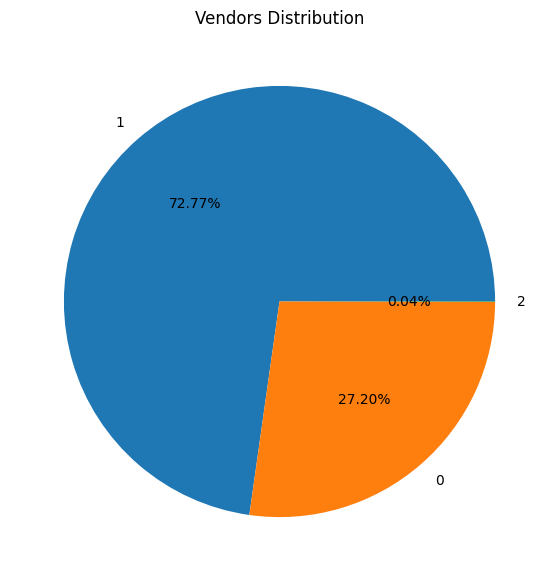

In [11]:
#Plot pie chart to see distribution of vendors
plt.figure(figsize = (7,7))
plt.pie(value_count_vendors.values,autopct="%1.2f%%" ,labels=value_count_vendors.index)
plt.title('Vendors Distribution')

#Display the pie chart
plt.show()


Since data associated with `vendorId` is neligible, we will understand the distribution of our target variable `total_amount` for each `vendorId` to understand if there are underlying hidden pattern for any specific `vendorID`.

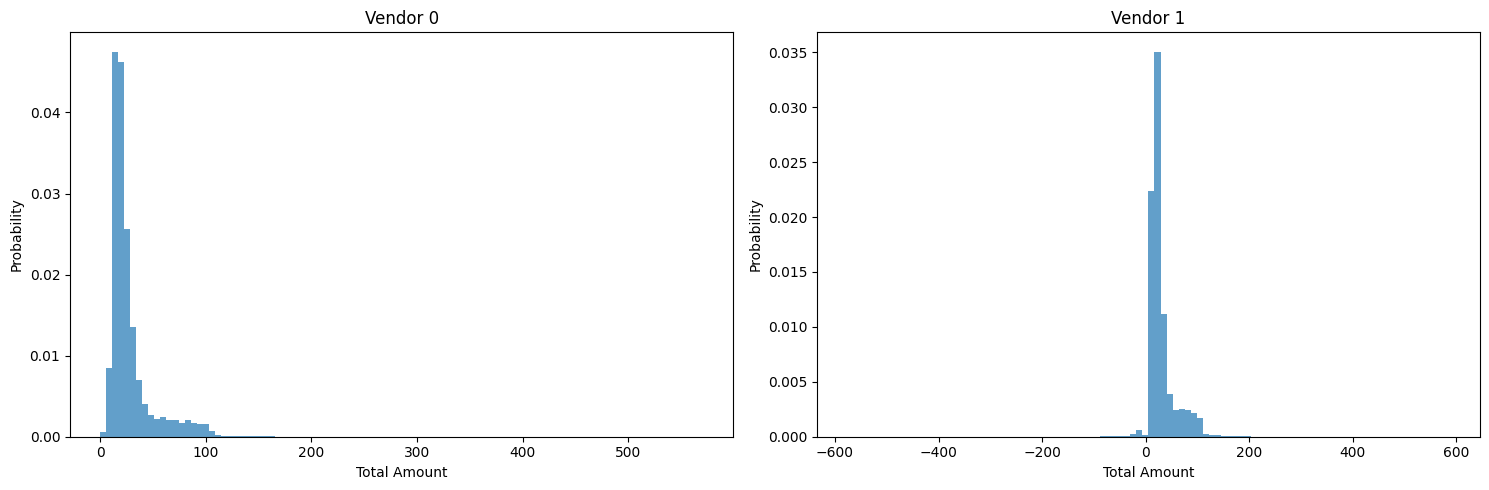

In [12]:
#Plotting subplots as there are 3 vendors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#Plotting histograms for each VendorID
for vendor_id, ax in zip(range(2), axes):
    ax.hist(train_data[train_data['VendorID'] == vendor_id]['total_amount'],bins = 100 ,alpha=0.7,density = True)
    ax.set_title(f'Vendor {vendor_id}')
    ax.set_xlabel('Total Amount')
    ax.set_ylabel('Probability')

#Adjusting layout
plt.tight_layout()

#Display the subplots
plt.show()

In order to understand the above graph, Let's look at Mean and Variance.

In [13]:
#Grouping the vendors by their Vendor ID
group_by_vendor = train_data.groupby(by='VendorID')

In [14]:
#Check mean for each Vendor ID
mean_total_amount = group_by_vendor['total_amount'].mean()
mean_total_amount

VendorID
0    28.004031
1    30.234273
2    47.500317
Name: total_amount, dtype: float64

In [15]:
#Check variance for each Vendor ID
variance_total_amount = group_by_vendor['total_amount'].std()
variance_total_amount

VendorID
0    22.550570
1    26.393108
2    20.608815
Name: total_amount, dtype: float64

We see that `total_amount` has different mean and variance so `vendorId` may be an important feature for our model training. However we will use feature selection techniques to decide on final features.

Now, Let's explore another column **`tpep_pickup_datetime`** and **`tpep_dropff_datetime`** 

In [16]:
#Now, let's look at datetime column and understand it's data
print('Columns: tpep_pickup_datetime & tpep_dropoff_datetime')
print(f'Datatype of columns :\ntpep_pickup_datetime: {train_data["tpep_pickup_datetime"].dtype},\ntpep_dropoff_datetime: {train_data["tpep_dropoff_datetime"].dtype}')
print(f'Total no. of Pickup Datetime Unique Values: {len(train_data["tpep_pickup_datetime"].unique())}')
print(f'Total no. of Dropoff Datetime Unique Values: {len(train_data["tpep_dropoff_datetime"].unique())}')

Columns: tpep_pickup_datetime & tpep_dropoff_datetime
Datatype of columns :
tpep_pickup_datetime: object,
tpep_dropoff_datetime: object
Total no. of Pickup Datetime Unique Values: 109877
Total no. of Dropoff Datetime Unique Values: 109713


Let's look for any missing values in this column

In [17]:
#Check for null values
train_data[['tpep_pickup_datetime','tpep_dropoff_datetime']].isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
dtype: int64

There are `zero` missing values for above both tables

Since the dtype of above columns is object, Let's convert dtype of these columns to datetime

In [18]:
#Let's change the datatype of column
train_data['tpep_pickup_datetime'] = pd.to_datetime(train_data['tpep_pickup_datetime'])
train_data['tpep_dropoff_datetime'] = pd.to_datetime(train_data['tpep_dropoff_datetime'])
train_data['tpep_pickup_datetime'].dtype, train_data['tpep_dropoff_datetime'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [19]:
#Creating a new column for duration
train_data['duration'] = (train_data['tpep_dropoff_datetime'] - train_data['tpep_pickup_datetime']).dt.total_seconds() / 60
train_data['duration'].head()

0   -45.600000
1   -63.433333
2    53.650000
3    56.866667
4    18.833333
Name: duration, dtype: float64

The result of the above data shows that for some of the columns with negative duration. This indicates that there are some anomalies while recording the pickup and dropoff times.

Since, we can't reach to the source to clearify this doubt, We will assume that the pick up date and drop off dates might have been swapped

Let's first check how many such wrong entries are there:

In [20]:
#Checking anomalies in duration
(train_data['duration']<0).sum()

65674

There are `65674` such entries are there where `tpep_dropofF_time` is earlier than `tpep_pickup_time`. Since Count of these entries are very large, In our analysis we will take the absolute difference of time to calculate the duration, considering that there might be some while recording the data.

We can't do much about this data as we don't have channels to communicate with the source of data on possible reason of discrepency for this dataset.

In [21]:
#Rectifying data with our analysis
train_data['duration'] = abs(train_data['tpep_dropoff_datetime'] - train_data['tpep_pickup_datetime']).dt.total_seconds() / 60
train_data['duration'].head()

0    45.600000
1    63.433333
2    53.650000
3    56.866667
4    18.833333
Name: duration, dtype: float64

Now, Let' understand the distribution of the duration by ploting density plot

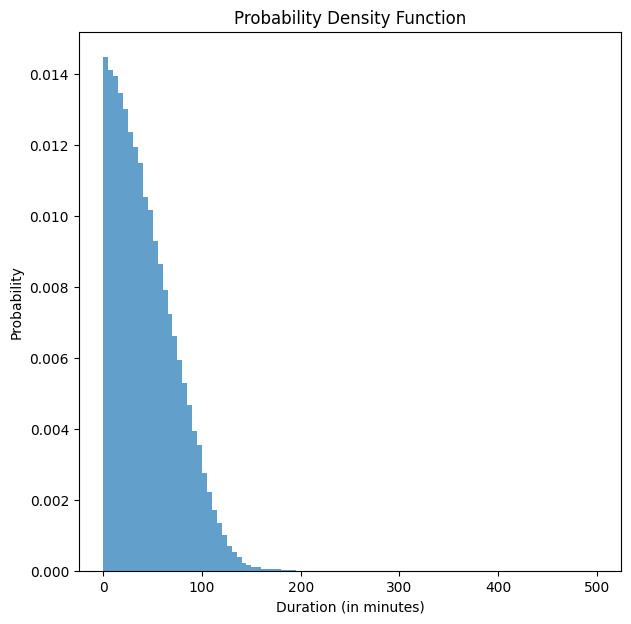

In [22]:
#Plotting histogram to check probability density function of Duration
plt.figure(figsize = (7,7))
plt.hist(train_data['duration'],bins = 100 ,alpha=0.7,density = True,range = (0,500))
plt.title('Probability Density Function')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Probability')

#Display the histogram
plt.show()

Let's look at presence of any outliers in the `duration`.

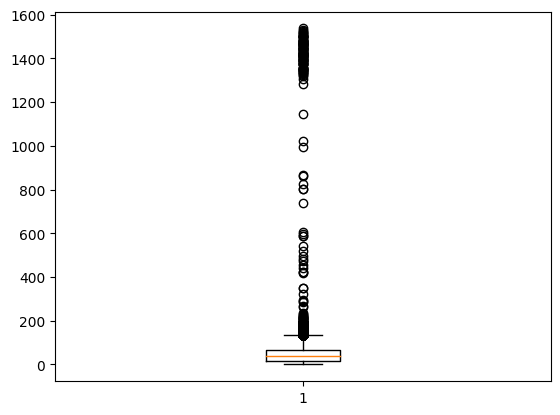

In [23]:
#For checking outliers we plot Boxplot
plt.boxplot(train_data['duration'])

#Display the box plot
plt.show()

We see that we have many outliers for this column (`duration`)

Let's also look at the corelation between `duration` and `total_amount`; our target variable

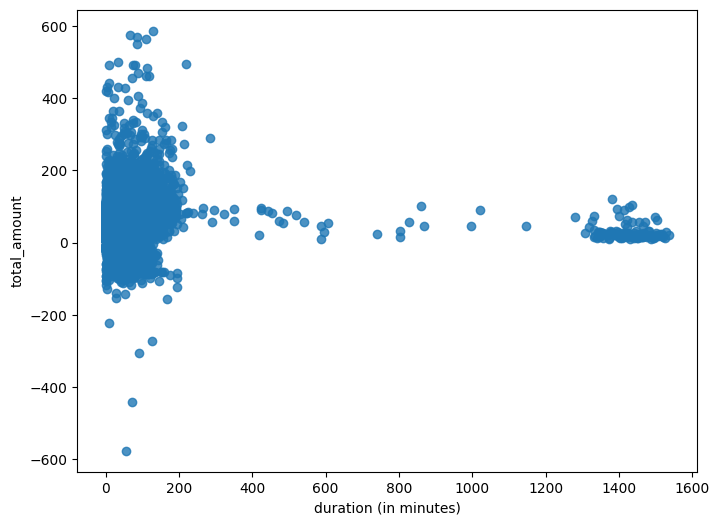

In [24]:
#Plotting scatter plot for total amount and duration
plt.figure(figsize=(8, 6))
plt.scatter(train_data['duration'], train_data['total_amount'], alpha=0.8)
plt.xlabel('duration (in minutes)')
plt.ylabel('total_amount')

#Display the scatter plot
plt.show()

Let's extract few more potential features from these columns such as date of booking and time of booking

In [25]:
#Creating new column for pickup date and time
train_data['pickup_date'] = train_data['tpep_pickup_datetime'].dt.date
train_data['pickup_hour'] = train_data['tpep_pickup_datetime'].dt.hour

Let's look at value count of total booking per day 


In [26]:
#Check for total value count for each pickup date
train_data['pickup_date'].value_counts()

pickup_date
2023-06-29    73709
2023-06-30    66037
2023-06-28    34510
2023-07-01      744
Name: count, dtype: int64

Here we see that dataset available has booking from just 4 days with highest booking on `29 June 2023` and `30 June 2023`.

Also, In order to understand peak booking hours, let's plot frequency plot of `pickup_hour`.

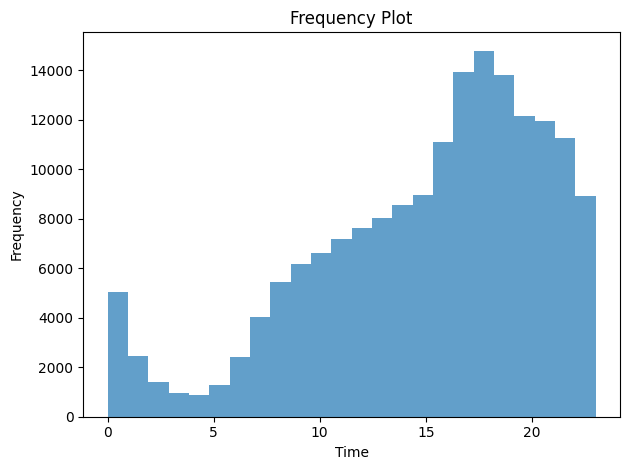

In [27]:
#Plotting histogram to check peak booking hours
plt.hist(train_data['pickup_hour'], bins = 24, alpha = 0.7)
plt.title('Frequency Plot')
plt.xlabel('Time')
plt.ylabel('Frequency')

#Adjusting histogram
plt.tight_layout()

#Display histogram
plt.show()

We can classify the booking time into three bins i.e `low`, `moderate` and `high` peak timings and will use this feature for our model training. We understand that this is not the ideal method to model the peak timings in real scenerio however history can be starting point to model peak and at latter stage real time information can be used if one has the access to that data. 

**`low` peak from the data  can fall in the range timing of $[0,8]$, booking between $[8-15]$ can be classifies as `moderate` peak and booking between $[15-24]$ can be considered `high` peak.**

Let's explore another column **`passenger_count`**

In [28]:
#Now let's look at passenger_count column and understand it's data
print('Column : passenger_count')
print(f'Datatype of columns : {train_data["passenger_count"].dtype}')
print(f'Total number of unique values : {len(train_data["passenger_count"].unique())}')
print(f'Unique Values are : {train_data["passenger_count"].unique()}')

Column : passenger_count
Datatype of columns : float64
Total number of unique values : 10
Unique Values are : [ 1.  3.  0.  2. nan  4.  6.  5.  8.  9.]


From the unique values, we see that there are a few `nan` values. Let's see how many values are missing

In [29]:
#Check for null values
train_data['passenger_count'].isnull().sum()

6077

There are total $6077$ missing values for passenger count. We need to `impute` the nan values while model training

Let's look at value counts for each unique values as well

In [30]:
#Check for total value count for each passenger
value_count_passengers = train_data['passenger_count'].value_counts()
value_count_passengers

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64

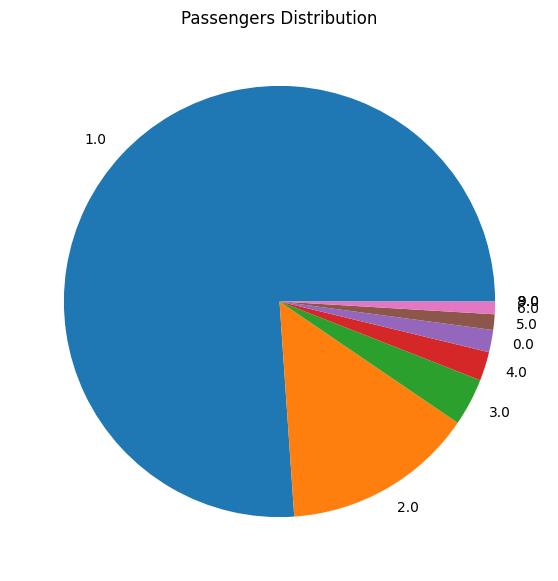

In [31]:
#Plot pie chart to see distribution of passenger count
plt.figure(figsize=(7,7))
plt.pie(value_count_passengers.values ,labels=value_count_passengers.index, pctdistance=0.85)
plt.title('Passengers Distribution')

#Display pie chart
plt.show()


Above pie plot shows portion ratio passenger count through out the dataset 

Let's understand the distribution of our target variable for different value of `passenger_count`

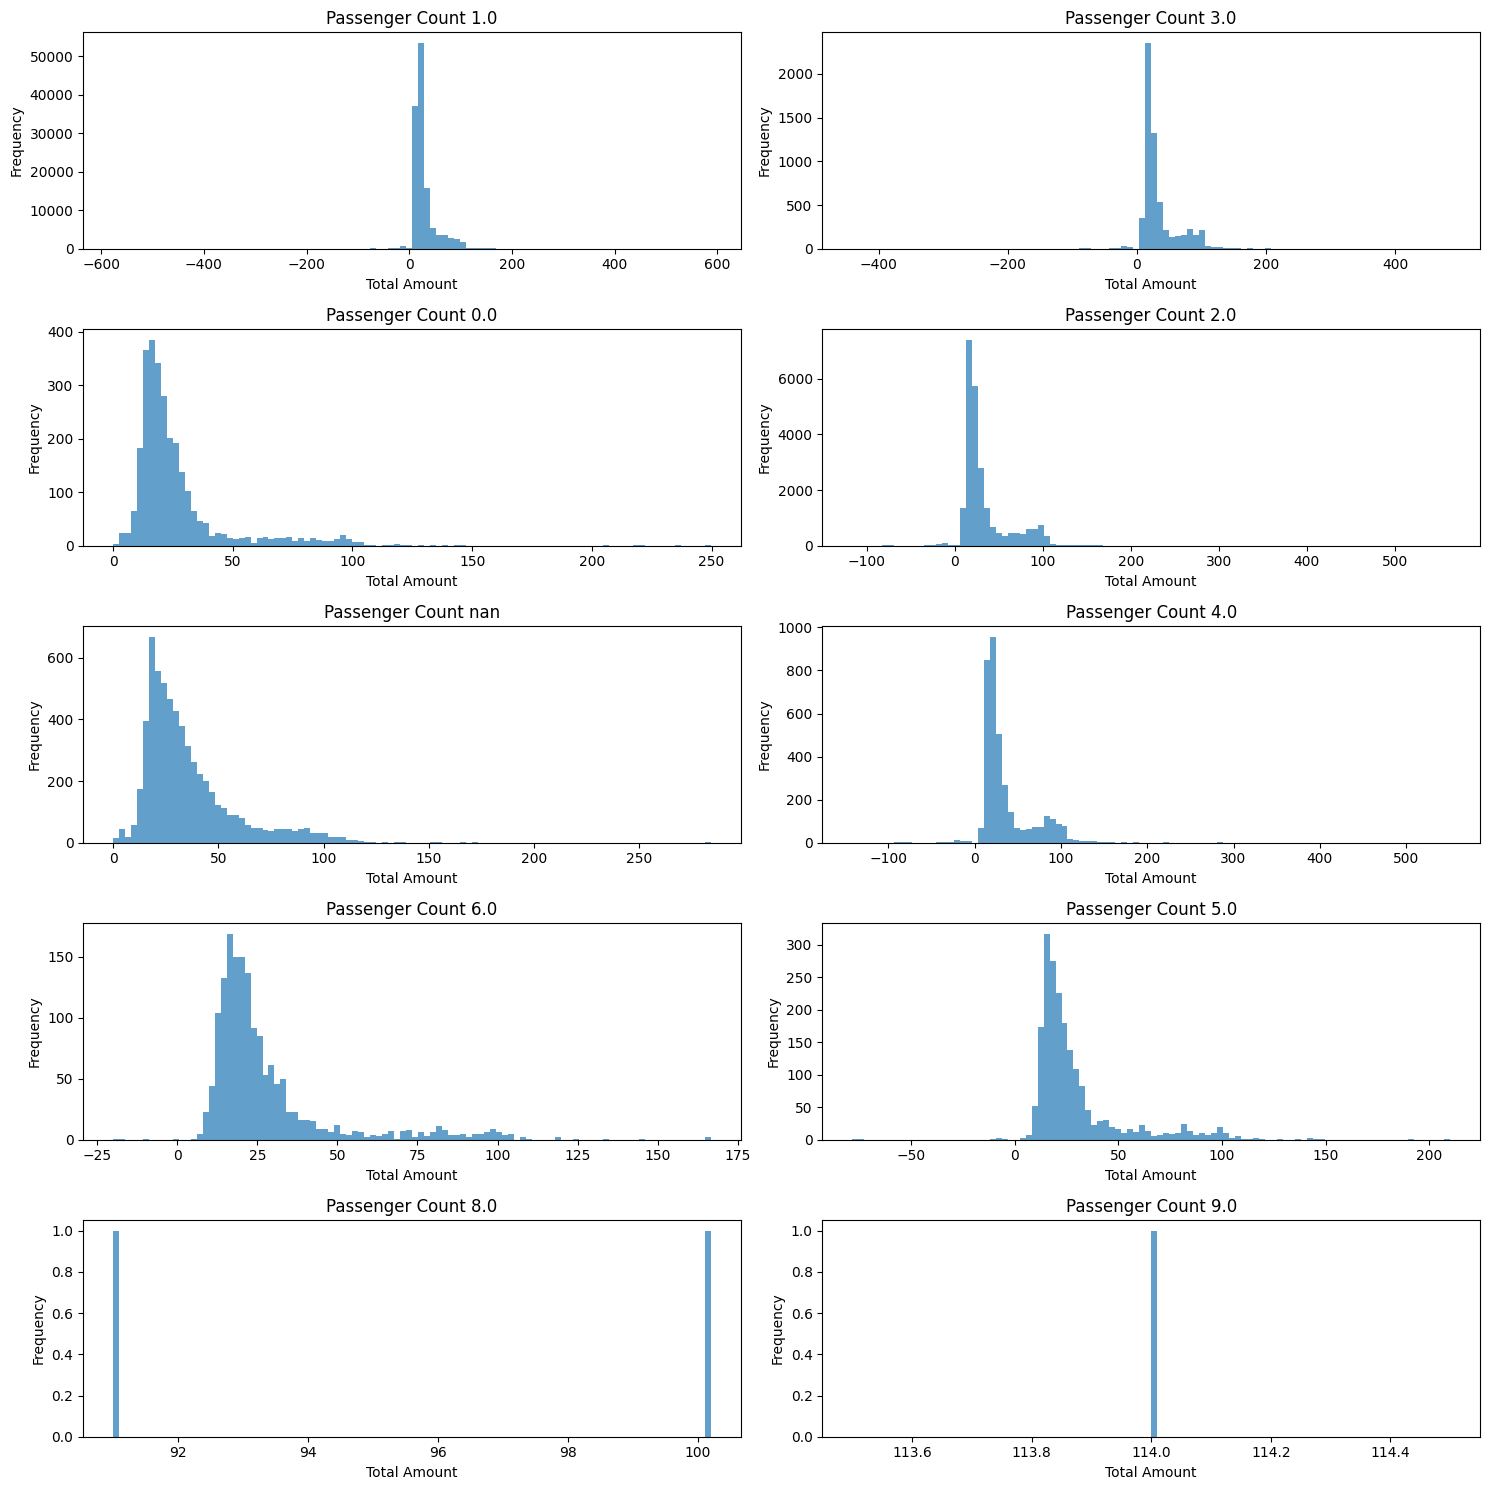

In [32]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axes = axes.flatten()

values = train_data["passenger_count"].unique()
# values.dtype = float

# Plotting histograms for each passenger
for passenger_count, ax in zip(values, axes):
    if np.isnan(passenger_count):
        ax.hist(train_data[train_data['passenger_count'].isna()]['total_amount'],bins = 100 ,alpha=0.7)
    else:
        ax.hist(train_data[train_data['passenger_count'] == passenger_count]['total_amount'],bins = 100 ,alpha=0.7)

    ax.set_title(f'Passenger Count {passenger_count}')
    ax.set_xlabel('Total Amount')
    ax.set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()

# Display the subplots
plt.show()

Let's explore another column **`trip_distance`**

In [33]:
#Now, let's look at trip_distance column and understand it's data
print('Column: trip_distance')
print(f'Datatype of columns: {train_data["trip_distance"].dtype}')
print(f'Total number of unique values: {len(train_data["trip_distance"].unique())}')

Column: trip_distance
Datatype of columns: float64
Total number of unique values: 2929


Let's look for missing values in this column

In [34]:
#Check for null values
train_data['trip_distance'].isnull().sum()

0

There are `zero` missing values

Now Let's looks for potential outliers for `trip distance`

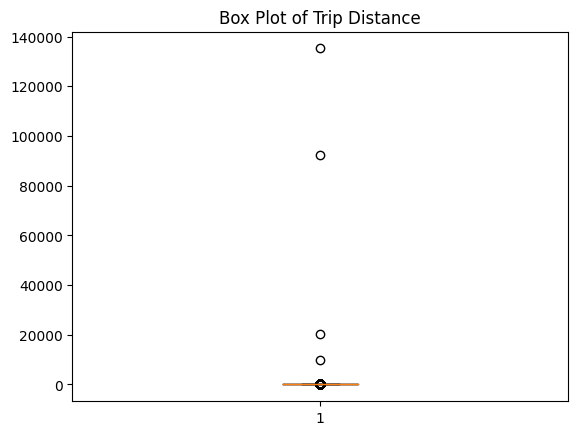

In [35]:
#Plotting box plot
plt.boxplot(train_data['trip_distance'])
plt.title('Box Plot of Trip Distance')

#Display box plot
plt.show()

Outliers are present in the column `trip_distance` as visible by the box plot above. We will handle these outliers while data cleaning.

Also, Let's look for its distribution

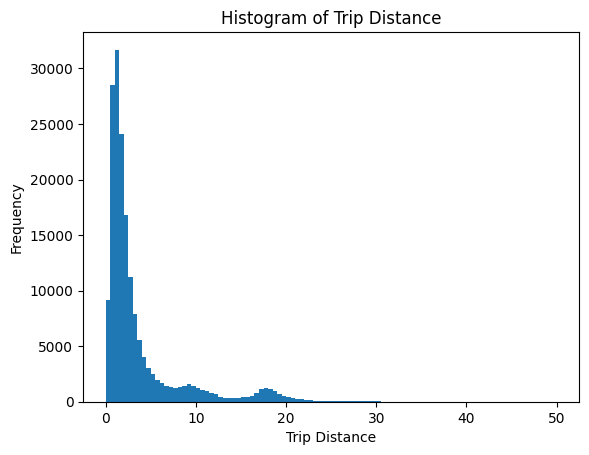

In [36]:
#Plotting Histogram to look at it's distribution
plt.hist(train_data['trip_distance'], bins = 100, range=(0,50))
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')

#Display Histogram
plt.show()

Let's look at another column **`RateCodeID`**

In [37]:
#Now let's look at RatecodeID column and understand it's data
print('Column: RatecodeID')
print(f'Datatype of columns: {train_data["RatecodeID"].dtype}')
print(f'Total number of unique values: {len(train_data["RatecodeID"].unique())}')
print(f'Unique Values are: {train_data["RatecodeID"].unique()}')

Column: RatecodeID
Datatype of columns: float64
Total number of unique values: 7
Unique Values are: [ 1. 99.  3. nan  2.  5.  4.]


We see that there is an outlier i.e value `99`. Since generally rating happens to be between 1-5. We will take care of this value. 

Also we see that there is presence of `nan` value here. Let's see total count of `nan` values 

In [38]:
#check for null values
train_data["RatecodeID"].isnull().sum()

6077

There are about `6077` rows for which values are missing

Let's look at value counts for each unique values

In [39]:
#Check for total value count for each rating
value_count_rating = train_data['RatecodeID'].value_counts()
value_count_rating

RatecodeID
1.0     158652
2.0       7314
5.0       1036
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64

We will replace the any value bigger than 5 with mean `RateCodeID` during data cleaning phase

Let's look for another column **`store_and_fwd_flag`**

In [40]:
#Now ,let's look at store_and_fwd_flag column and understand it's data
print('Column: store_and_fwd_flag')
print(f'Datatype of columns: {train_data["store_and_fwd_flag"].dtype}')
print(f'Total number of unique values: {len(train_data["store_and_fwd_flag"].unique())}')
print(f'Unique Values are: {train_data["store_and_fwd_flag"].unique()}')

Column: store_and_fwd_flag
Datatype of columns: object
Total number of unique values: 3
Unique Values are: ['N' nan 'Y']


From the unique values, we see that there are a few nan values. Let's see how many values are missing

In [41]:
#check for null values
train_data["store_and_fwd_flag"].isnull().sum()

6077

There are total `6077` missing values for store and fwd flag. We need to impute the nan values while model training

Let's look at value counts for each unique values

In [42]:
#Check for total value count for each flag
value_count_flag = train_data['store_and_fwd_flag'].value_counts()
value_count_flag

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

Now, let's analyze **`PULocationID`** and **`DULocationID`** columns

In [43]:
#Now, let's look at LocationID columns and understand it's data
print('Columns: PULocationID & DOLocationID')
print(f'Datatype of columns: {train_data["PULocationID"].dtype}, {train_data["DOLocationID"].dtype}')
print(f'Total number of unique values: {len(train_data["PULocationID"].unique())}, {len(train_data["DOLocationID"].unique())}')

Columns: PULocationID & DOLocationID
Datatype of columns: int64, int64
Total number of unique values: 264, 264


Let's look for any missing values in these columns

In [44]:
print(f'Total number of missing values: {(train_data["PULocationID"].isnull().sum())}, {(train_data["DOLocationID"].isnull().sum())}')

Total number of missing values: 0, 0


There are `zero` null values in this column

Now, let's analyze another column **`payment_type`**

In [45]:
#Now let's look at payment_type column and understand it's data
print('Column: payment_type')
print(f'Datatype of columns: {train_data["payment_type"].dtype}')
print(f'Total number of unique values: {len(train_data["payment_type"].unique())}')
print(f'Unique Values are: {train_data["payment_type"].unique()}')

Column: payment_type
Datatype of columns: object
Total number of unique values: 5
Unique Values are: ['Credit Card' 'Cash' 'Wallet' 'UPI' 'unknown']


Let's look for any missing values in these column

In [46]:
train_data['payment_type'].isnull().sum()

0

There are `zero` null values in this column

Let's look at value counts for each unique values

In [47]:
#Check for total value count for each payment type
value_count_payment_type = train_data['payment_type'].value_counts()
value_count_payment_type

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

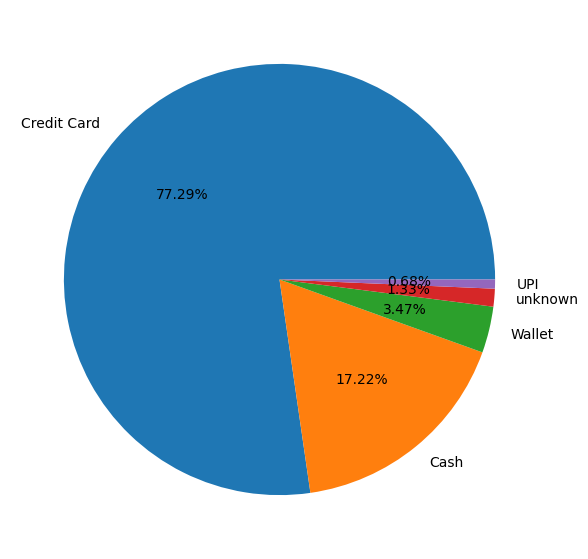

In [48]:
#Plot pie chart to see distribution of payment type
plt.figure(figsize = (7,7))
plt.pie(value_count_payment_type.values, labels = value_count_payment_type.index, autopct = "%1.2f%%")

#Display pie chart
plt.show()

Above pie plot shows portion ratio payment type through out the dataset

Let's understand the distribution of our target variable for different value of `payment_type`

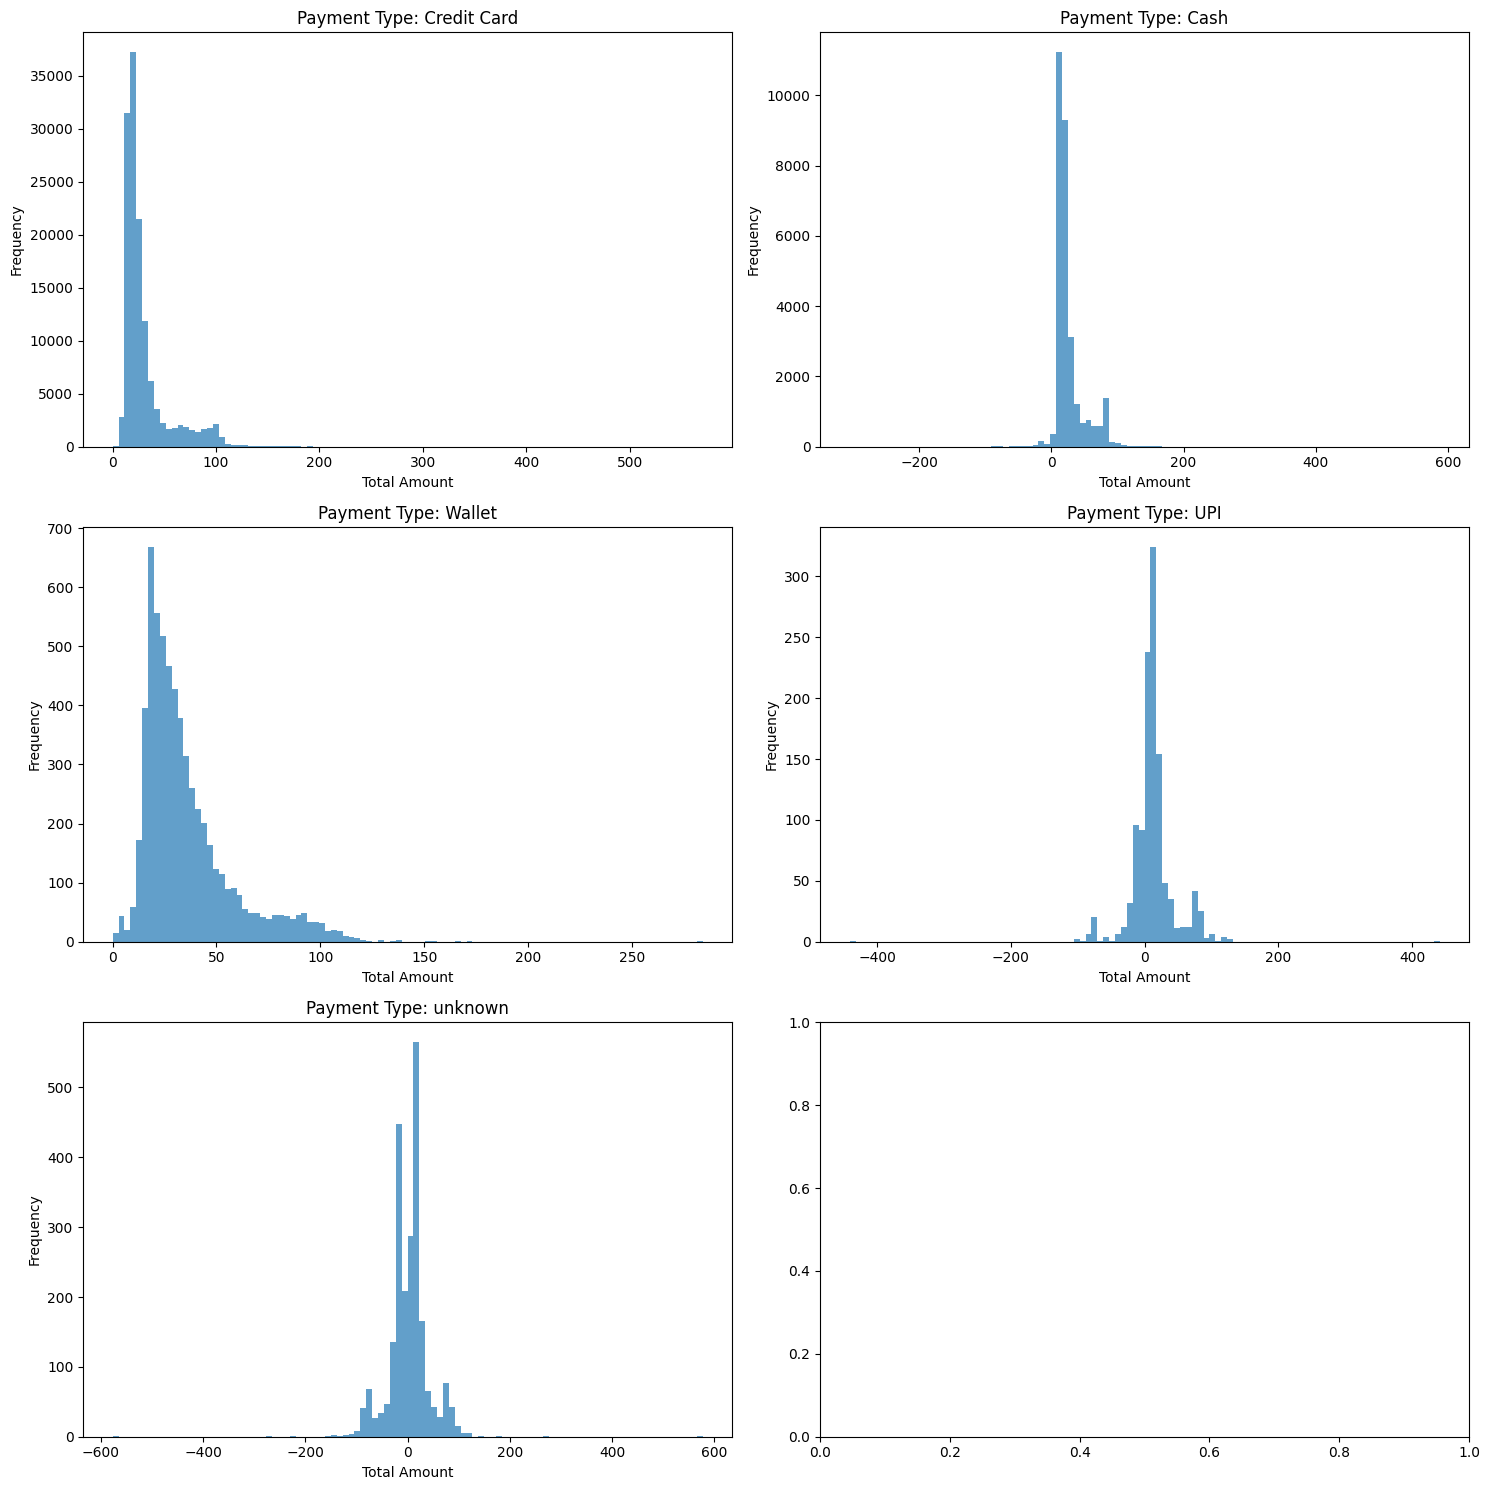

In [49]:
#Plotting subplots as there are 5 payment types
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
axes = axes.flatten()

values = train_data["payment_type"].unique()
#values.dtype = float

#Plotting histograms for each payment type
for payment_type, ax in zip(values, axes):
    ax.hist(train_data[train_data['payment_type'] == payment_type]['total_amount'],bins = 100 ,alpha=0.7)
    ax.set_title(f'Payment Type: {payment_type}')
    ax.set_xlabel('Total Amount')
    ax.set_ylabel('Frequency')

#Adjusting layout
plt.tight_layout()

#Display the subplots
plt.show()

Now, Let's analyze another column **`extra`**

In [50]:
#Now, let's look at extra column and understand it's data
print('Column: extra')
print(f'Datatype of columns: {train_data["extra"].dtype}')
print(f'Total number of unique values: {len(train_data["extra"].unique())}')

Column: extra
Datatype of columns: float64
Total number of unique values: 28


Let's look for any missing values in this column

In [51]:
#Check for null values
train_data['extra'].isnull().sum()

0

There are `zero` null values in this column

Now, Let' understand the distribution of the duration by ploting density plot

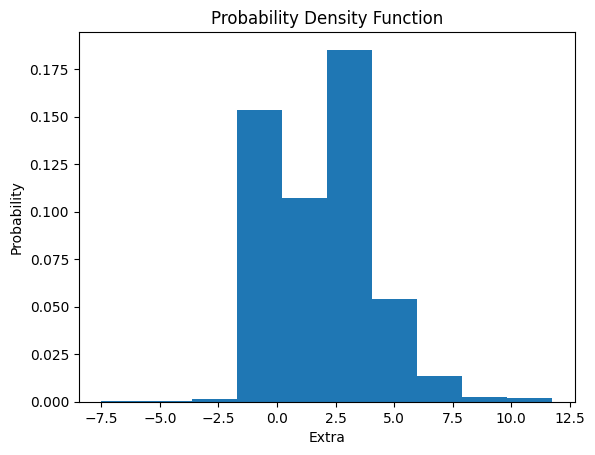

In [52]:
#Plotting Histogram to check probability density function of extra
plt.hist(train_data['extra'], density = True)
plt.title('Probability Density Function')
plt.xlabel('Extra')
plt.ylabel('Probability')


#Display histogram
plt.show()

Now Let's looks for potential outliers for `extra`

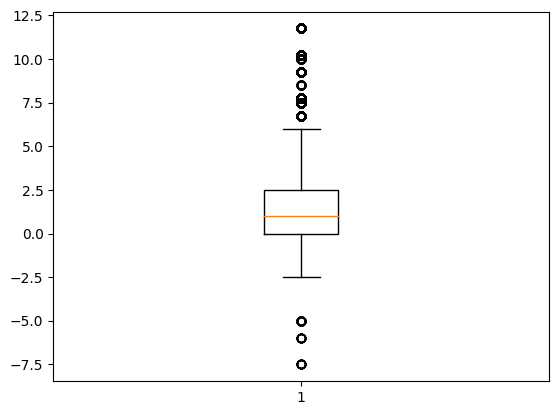

In [53]:
#Plotting box plot
plt.boxplot(train_data['extra'])

#Display Box Plot
plt.show()

We see that we have many outliers for this column (extra)

Now Let's analyze **`tip_amount`** column

In [54]:
#Now let's look at tip_amount column and understand it's data
print('Column: tip_amount')
print(f'Datatype of columns: {train_data["tip_amount"].dtype}')
print(f'Total number of unique values: {len(train_data["tip_amount"].unique())}')

Column: tip_amount
Datatype of columns: float64
Total number of unique values: 175000


Let's look for any missing values in this column

In [55]:
#Check for null values
train_data['tip_amount'].isnull().sum()

0

There are `zero` null values in this column

In order to understand tip amount, let's plot frequency plot of `tip_amount`.

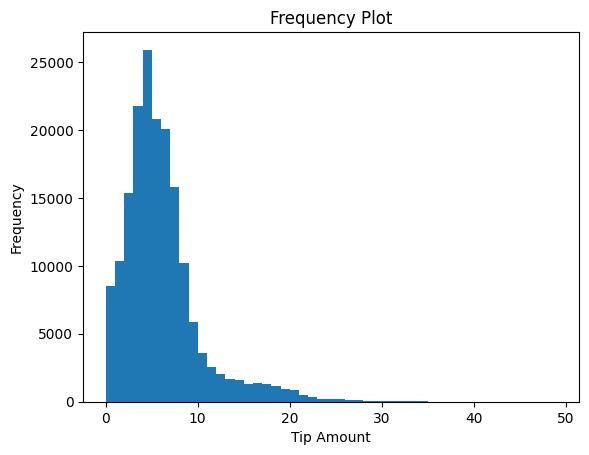

In [56]:
#Plotting histogram to check highest tip amount
plt.hist(train_data['tip_amount'], range(0, 50))
plt.title('Frequency Plot')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

#Display Histogram
plt.show()

 Let's look at presence of any outliers in the `tip_amount`

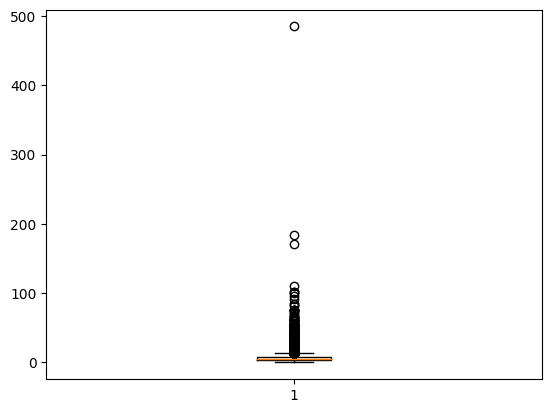

In [57]:
#Plotting Box plot
plt.boxplot(train_data['tip_amount'])

#Display box plot
plt.show()

We see that we have many outliers for this column (tip_amount)

Now, Let's analyze **`tolls_amount`** column

In [58]:
#Now let's look at tolls_amount column and understand it's data
print('Column: tolls_amount')
print(f'Datatype of columns: {train_data["tolls_amount"].dtype}')
print(f'Total number of unique values: {len(train_data["tolls_amount"].unique())}')

Column: tolls_amount
Datatype of columns: float64
Total number of unique values: 214


Let's look for any missing values in this column

In [59]:
#Check for null values
train_data['tolls_amount'].isnull().sum()

0

There are `zero` missing values for above both tables

 In order to understand tip amount, let's plot frequency plot of `tolls_amount`.

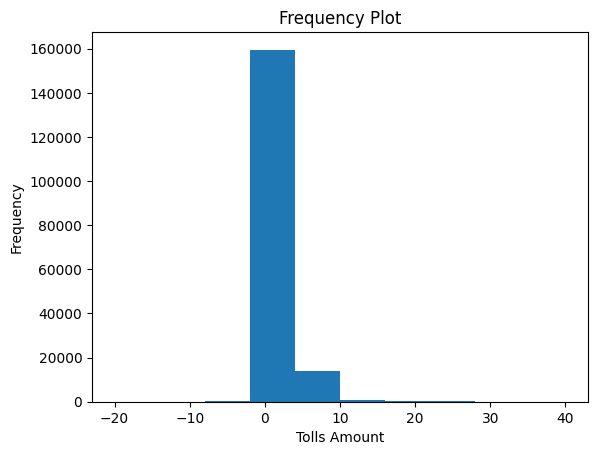

In [60]:
#Plotting histogram to check highest tip amount
plt.hist(train_data['tolls_amount'], range=(-20,40))
plt.title('Frequency Plot')
plt.xlabel('Tolls Amount')
plt.ylabel('Frequency')

#Display histogram
plt.show()

Let's look at presence of any outliers in the `tolls_amount`

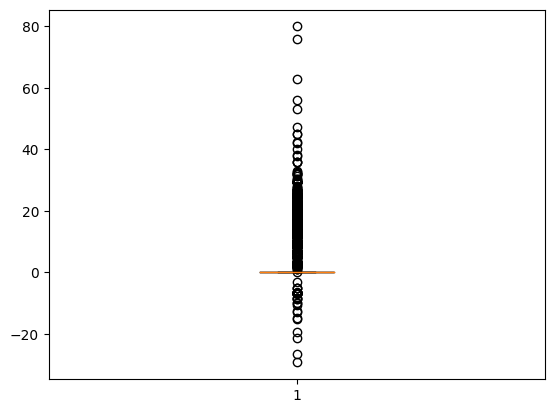

In [61]:
#Plotting Box plot
plt.boxplot(train_data['tolls_amount'])

#Display box plot
plt.show()

We see that we have many outliers for this column (tolls_amount)

In [62]:
#Now let's look at improvement_surcharge column and understand it's data
print('Column: improvement_surcharge')
print(f'Datatype of columns: {train_data["improvement_surcharge"].dtype}')
print(f'Total number of unique values: {len(train_data["improvement_surcharge"].unique())}')
print(f'Unique Values are: {train_data["improvement_surcharge"].unique()}')

Column: improvement_surcharge
Datatype of columns: float64
Total number of unique values: 4
Unique Values are: [ 1.   0.3 -1.   0. ]


Let's look for any missing values in this column

In [63]:
train_data['improvement_surcharge'].isnull().sum()

0

Let's look at value counts for each unique values

In [64]:
#Check for total value count for each improvement surcharge
value_count_improvement_surcharge = train_data['improvement_surcharge'].value_counts()
value_count_improvement_surcharge

improvement_surcharge
 1.0    173145
-1.0      1725
 0.3        85
 0.0        45
Name: count, dtype: int64

Now, Let's explore another column **`congestion_surcharge`**

In [65]:
#Now let's look at congestion_surcharge column and understand it's data
print('Column : congestion_surcharge')
print(f'Datatype of columns : {train_data["congestion_surcharge"].dtype}')
print(f'Total number of unique values : {len(train_data["congestion_surcharge"].unique())}')
print(f'Unique Values are : {train_data["congestion_surcharge"].unique()}')

Column : congestion_surcharge
Datatype of columns : float64
Total number of unique values : 4
Unique Values are : [ 2.5  0.   nan -2.5]


From the unique values, we see that there are a few `nan` values. Let's see how many values are missing

In [66]:
#check for null values
train_data['congestion_surcharge'].isnull().sum()

6077

There are `6077` null values for this column

Let's look at value counts for each unique values

In [67]:
#Check for total value count for each congestionsurcharge
value_count_congestion_surcharge = train_data['congestion_surcharge'].value_counts()
value_count_congestion_surcharge

congestion_surcharge
 2.5    153212
 0.0     14325
-2.5      1386
Name: count, dtype: int64

Now, Let's explore another column **`Airport_fee`**

In [68]:
#Now let's look at Airport_fee and understand it's data
print('Column : Airport_fee')
print(f'Datatype of columns : {train_data["Airport_fee"].dtype}')
print(f'Total number of unique values : {len(train_data["Airport_fee"].unique())}')
print(f'Unique Values are : {train_data["Airport_fee"].unique()}')

Column : Airport_fee
Datatype of columns : float64
Total number of unique values : 4
Unique Values are : [ 0.    1.75   nan -1.75]


From the unique values, we see that there are a few `nan` values. Let's see how many values are missing

In [69]:
#check for null values
train_data['Airport_fee'].isnull().sum()

6077

There are `6077` null values for this column

Let's look at value counts for each unique values

In [70]:
#Check for total value count for each Airport fee
value_count_airport_fee = train_data['Airport_fee'].value_counts()
value_count_airport_fee

Airport_fee
 0.00    153074
 1.75     15590
-1.75       259
Name: count, dtype: int64

As we have good understanding of data. Let's start with Data cleaning and Feature Extraction.

## Data Preprocessing

In [71]:
train_dataset=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_dataset=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [72]:
def preprocess_data(dataset):
    dataset['tpep_pickup_datetime'] = pd.to_datetime(dataset['tpep_pickup_datetime'])
    dataset['tpep_dropoff_datetime'] = pd.to_datetime(dataset['tpep_dropoff_datetime'])
    dataset['duration'] = (dataset['tpep_dropoff_datetime'] - dataset['tpep_pickup_datetime']).dt.total_seconds() / 60
    dataset['pickup_hour'] = dataset['tpep_pickup_datetime'].dt.hour
    label = ['low', 'moderate', 'high']
    bins = [0, 8, 15, 24]
    dataset['peak_bookings'] = pd.cut(dataset['pickup_hour'], bins, labels = label, include_lowest=True, right=False)  
    
    return dataset

In [73]:
train_dataset_preprocessed = preprocess_data(train_dataset)
test_processed_data = preprocess_data(test_dataset)

## Preprocessing Pipeline

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from xgboost import XGBRegressor

In [75]:
features = ['passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'duration',
       'peak_bookings']

label = 'total_amount'

In [76]:
train_feature_dataset = train_dataset_preprocessed[features]
train_labels = train_dataset_preprocessed[label]

In [77]:
train_feature_dataset.shape , train_labels.shape

((175000, 12), (175000,))

In [78]:
train_feature_dataset.head()

,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration,peak_bookings
0,1.0,2.14,1.0,Credit Card,2.5,7.165589,0.0,1.0,2.5,0.0,-45.600000,high
1,1.0,2.70,1.0,Credit Card,3.5,6.067401,0.0,1.0,2.5,0.0,-63.433333,high
2,1.0,1.15,1.0,Credit Card,0.0,4.111547,0.0,1.0,2.5,0.0,53.650000,moderate
3,1.0,0.40,1.0,Credit Card,2.5,6.411079,0.0,1.0,2.5,0.0,56.866667,moderate
4,3.0,1.10,1.0,Credit Card,1.0,4.769377,0.0,1.0,2.5,0.0,18.833333,high


In [79]:
categorical_features = ['payment_type','peak_bookings']
numerical_features = ['passenger_count','trip_distance','RatecodeID','extra',
                      'tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge',
                     'Airport_fee','duration']

In [80]:
numerical_pipeline = Pipeline([
                               ('imputer', SimpleImputer(strategy="mean")),
                               ('std_scaler', StandardScaler()),])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess_pipeline = ColumnTransformer([
    ("num",numerical_pipeline,numerical_features),
    ("cat",categorical_pipeline,categorical_features)
])

preprocess_pipeline


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count', 'trip_distance',
                                  'RatecodeID', 'extra', 'tip_amount',
                                  'tolls_amount', 'improvement_surcharge',
                                  'congestion_surcharge', 'Airport_fee',
                                  'duration']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['payment_type', 'peak_bookings'])])

## Model Building

In [81]:
X_train, X_test,y_train,y_test = train_test_split(train_feature_dataset,train_labels,test_size = 0.3, random_state = 42)

In [82]:
print(f'Shape of training set: {X_train.shape,y_train.shape}')
print(f'Shape of test set: {X_test.shape,y_test.shape}')

Shape of training set: ((122500, 12), (122500,))
Shape of test set: ((52500, 12), (52500,))


### Linear Regression

In [83]:
model_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('linear_reg',LinearRegression())
])

In [84]:
model_pipeline.fit(X_train,y_train)
y_pred = model_pipeline.predict(X_test)
linear_reg_r2_score = r2_score(y_test,y_pred)
linear_reg_r2_score

0.7281978602258562

#### Linear Regression with Polynomial Features

In [85]:
model_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('poly_features', PolynomialFeatures()),
    ('std_sclar',StandardScaler()),
    ('linear_reg',LinearRegression())
])

In [86]:
model_pipeline.fit(X_train,y_train)
y_pred = model_pipeline.predict(X_test)
poly_reg_r2_score = r2_score(y_test,y_pred)
poly_reg_r2_score

0.8916668157930476

In [87]:
param_grid = {
    'poly_features__degree': [1,2, 3], 
}
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'poly_features__degree': 1}
Best Score:  0.7285087490376834


In [88]:
best_poly_reg_model_pipeline = grid_search.best_estimator_
y_pred = best_poly_reg_model_pipeline.predict(X_test)
best_poly_reg_r2_score = r2_score(y_test,y_pred)
best_poly_reg_r2_score

0.728196035720708

### SGDRegressor

In [89]:
model_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline), 
    ('sgd_reg', SGDRegressor(loss = 'huber'))
])
model_pipeline.fit(X_train,y_train)
y_pred = model_pipeline.predict(X_test)
linear_reg_with_sgd_r2_score = r2_score(y_test,y_pred)
linear_reg_with_sgd_r2_score

0.7067126791995365

In [90]:
param_grid = {
    'sgd_reg__loss': ['squared_error', 'huber'],
    'sgd_reg__alpha':[0.0001,0.001,0.01,0.1,1],
    'sgd_reg__eta0': [0.001,0.01, 0.1],
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_pipeline, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'sgd_reg__alpha': 0.0001, 'sgd_reg__eta0': 0.1, 'sgd_reg__loss': 'huber'}
Best Score:  0.7170649718771


In [91]:
best_sgd_model_pipeline = grid_search.best_estimator_
best_sgd_model_pipeline.fit(X_train,y_train)
y_pred = best_sgd_model_pipeline.predict(X_test)
linear_reg_with_best_sgd_r2_score = r2_score(y_test,y_pred)
linear_reg_with_best_sgd_r2_score

0.7155330432908695

### Decision Tree Regressor and Random Forest Regressor

#### Decision Tree Regressor

In [92]:
model_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('DecisionTreeRegressor',DecisionTreeRegressor())
])

In [93]:
model_pipeline.fit(X_train,y_train)
y_pred = model_pipeline.predict(X_test)
r2_score(y_test,y_pred)

0.9159795963431896

#### Random Forest Regressor

In [94]:
model_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('RandomForest',RandomForestRegressor(max_features='sqrt'))
])

In [95]:
model_pipeline.fit(X_train,y_train)
y_pred = model_pipeline.predict(X_test)
r2_score(y_test,y_pred)

0.9450205560509418

Since vanila Random Forest Regressor is giving better score than vanila decision tree we will train our hyperparameters of random forest regressor to get better result

In [96]:
param_grid = {
    'RandomForest__n_estimators': [150, 100],          
    'RandomForest__max_depth': [20,10, None],
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_pipeline, param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'RandomForest__max_depth': 20, 'RandomForest__n_estimators': 150}
Best Score:  0.9327816265234473


In [97]:
best_random_forest_model_pipeline = grid_search.best_estimator_
best_random_forest_model_pipeline.fit(X_train,y_train)
y_pred = best_random_forest_model_pipeline.predict(X_test)
random_forest_with_best_r2_score = r2_score(y_test,y_pred)
random_forest_with_best_r2_score

0.945446932075515

### XGBRegressor

In [98]:
model_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('xgBoost',XGBRegressor())
])

In [99]:
model_pipeline.fit(X_train,y_train)
y_pred = model_pipeline.predict(X_test)
r2_score(y_test,y_pred)

0.9536339575878691

In [100]:
param_grid = {
    'xgBoost__learning_rate': [0.01, 0.1, 0.2],
    'xgBoost__n_estimators': [50, 100, 200],
    'xgBoost__max_depth': [3, 4, 5],
    'xgBoost__subsample': [0.8, 0.9, 1.0],
    
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_pipeline, param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'xgBoost__learning_rate': 0.1, 'xgBoost__max_depth': 5, 'xgBoost__n_estimators': 200, 'xgBoost__subsample': 1.0}
Best Score:  0.93796316416532


In [101]:
best_xgboost_model_pipeline = grid_search.best_estimator_
best_xgboost_model_pipeline.fit(X_train,y_train)
y_pred = best_xgboost_model_pipeline.predict(X_test)
xgboost_with_best_r2_score = r2_score(y_test,y_pred)
xgboost_with_best_r2_score

0.9522817871186829

Let's compare the r2 scores from different models

In [102]:
Results = {'Linear Regression': linear_reg_r2_score,
          'Linear Regression with Polynomial Features': best_poly_reg_r2_score,
           'SGDRegressor': linear_reg_with_best_sgd_r2_score,
           'Random Forest Regressor': random_forest_with_best_r2_score,
           'XGBRegressor': xgboost_with_best_r2_score
          }

results_df = pd.DataFrame(list(Results.items()), columns=['Model', 'R2 Score'])
results_df

,Model,R2 Score
0,Linear Regression,0.728198
1,Linear Regression with Polynomial Features,0.728196
2,SGDRegressor,0.715533
3,Random Forest Regressor,0.945447
4,XGBRegressor,0.952282


Since, the r2 score on the test data is highest with XGBRegressor  will train our final model with XGBRegressor.

In [103]:
model_pipeline = best_xgboost_model_pipeline

In [104]:
#Don't delete this code block
model_pipeline.fit(train_feature_dataset,train_labels)
y_pred = model_pipeline.predict(test_processed_data)

In [105]:
#Don't delete this code
submission = pd.DataFrame({"ID": np.arange(1,test_processed_data.shape[0]+1), 
                           "total_amount": y_pred}) 

submission.to_csv('submission.csv',index=False)